In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [441]:
# Importing Ecommerce data set and viewing first 5 rows
data = pd.read_csv('ecommerce_2025.csv')

In [442]:
data.head(5)

,Order_Date,Time,Age,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Revenue,Shipping_Cost,Order_Priority,Payment_method,MKTG_Channel,Marketing_Spend
0,2018-01-02,10:56:33,36,37077,1,1,Member,Auto & Accessories,Car Media Players,140.0,4.6,Medium,credit_card,Email,16.10
1,2018-07-24,20:41:37,54,59173,1,1,Member,Auto & Accessories,Car Speakers,211.0,11.2,Medium,credit_card,Email,41.53
2,2018-11-08,08:38:49,32,41066,1,1,Member,Auto & Accessories,Car Body Covers,117.0,3.1,Critical,credit_card,Social,45.74
3,2018-04-18,19:28:06,43,50741,1,1,Member,Auto & Accessories,Car & Bike Care,118.0,2.6,High,credit_card,Paid Search,94.25
4,2018-08-13,21:18:39,48,53639,1,1,Member,Auto & Accessories,Tyre,250.0,16.0,Critical,credit_card,YouTube,34.08


In [443]:
data.describe()

,Age,Customer_Id,Gender,Device_Type,Revenue,Shipping_Cost,Marketing_Spend
count,51283.000000,51283.000000,51283.000000,51283.000000,51283.000000,51283.000000,51283.000000
mean,41.427881,58159.120683,0.451436,0.928670,152.337110,7.041138,49.344036
std,13.885263,26031.895346,0.497641,0.257377,66.491842,4.871642,24.518235
min,18.000000,10000.000000,0.000000,0.000000,33.000000,0.100000,10.000000
25%,29.000000,35838.000000,0.000000,1.000000,85.000000,2.500000,29.150000
50%,41.000000,61021.000000,0.000000,1.000000,133.000000,6.000000,44.360000
75%,53.000000,80738.500000,1.000000,1.000000,218.000000,11.800000,69.255000
max,65.000000,99999.000000,1.000000,1.000000,250.000000,16.800000,100.000000


In [444]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51283 entries, 0 to 51282
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51283 non-null  object 
 1   Time                 51283 non-null  object 
 2   Age                  51283 non-null  int64  
 3   Customer_Id          51283 non-null  int64  
 4   Gender               51283 non-null  int64  
 5   Device_Type          51283 non-null  int64  
 6   Customer_Login_type  51283 non-null  object 
 7   Product_Category     51283 non-null  object 
 8   Product              51283 non-null  object 
 9   Revenue              51283 non-null  float64
 10  Shipping_Cost        51283 non-null  float64
 11  Order_Priority       51283 non-null  object 
 12  Payment_method       51283 non-null  object 
 13  MKTG_Channel         51283 non-null  object 
 14  Marketing_Spend      51283 non-null  float64
dtypes: float64(3), int64(4), object(8)
m

In [445]:
# Converting Date from Object to Date type
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51283 entries, 0 to 51282
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51283 non-null  datetime64[ns]
 1   Time                 51283 non-null  object        
 2   Age                  51283 non-null  int64         
 3   Customer_Id          51283 non-null  int64         
 4   Gender               51283 non-null  int64         
 5   Device_Type          51283 non-null  int64         
 6   Customer_Login_type  51283 non-null  object        
 7   Product_Category     51283 non-null  object        
 8   Product              51283 non-null  object        
 9   Revenue              51283 non-null  float64       
 10  Shipping_Cost        51283 non-null  float64       
 11  Order_Priority       51283 non-null  object        
 12  Payment_method       51283 non-null  object        
 13  MKTG_Channel         51283 non-

In [446]:
# Explanatory Analysis
# breakdown of marketing spend by channel

Channel_spend = data.groupby('MKTG_Channel')['Marketing_Spend'].sum().sort_values(ascending=False).reset_index()
Channel_spend

,MKTG_Channel,Marketing_Spend
0,Paid Search,968164.27
1,YouTube,761165.23
2,Email,417108.48
3,Social,384072.22


Text(0.5, 1.0, 'Spend by Marketing Channel')

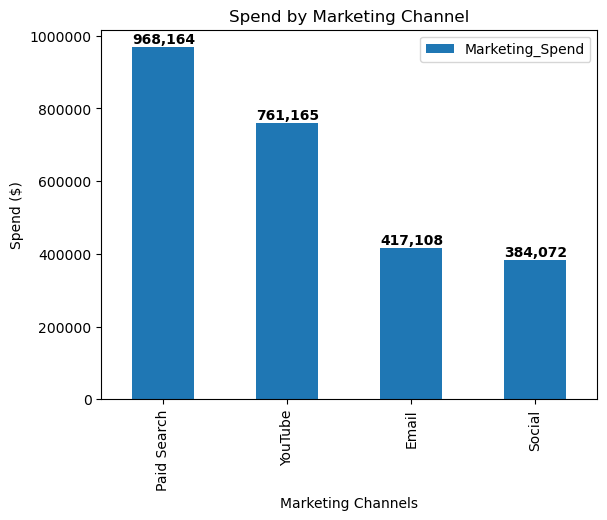

In [447]:
# Graph of Spend by MKTG Channel
mktg_channel_spend = Channel_spend.plot.bar(x='MKTG_Channel', y='Marketing_Spend', rot=90, title='Total Spend By Marketing Channel')

# Adding labels and title
plt.xlabel('MKTG Channel')
plt.ylabel('Total Spend')
plt.title('Total Spend By Marketing Channel')



# Disable scientific notation
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)


# Adding data labels on top of bars
for index, value in enumerate(Channel_spend['Marketing_Spend']):
    plt.text(index, value + 10_000, f'{int(value):,}', ha='center', fontsize=10, fontweight='bold')


# Labels and title
plt.xlabel("Marketing Channels")
plt.ylabel("Spend ($)")
plt.title("Spend by Marketing Channel")


In [448]:
#breakdown of revenue by channel

channel_revenue = data.groupby('MKTG_Channel')['Revenue'].sum().sort_values(ascending=False).reset_index()
channel_revenue

,MKTG_Channel,Revenue
0,Paid Search,1976578.0
1,Email,1959338.0
2,Social,1950606.0
3,YouTube,1925782.0


Text(0.5, 1.0, 'Revenue by Marketing Channel')

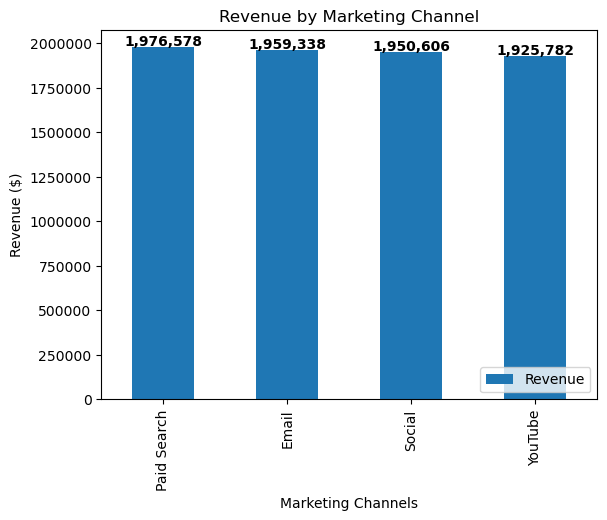

In [449]:
# Graph of Revenue by MKTG Channel
mktg_channel_graph = channel_revenue.plot.bar(x='MKTG_Channel', y='Revenue', rot=90, title='Total Revenue By Marketing Channel')

# Adding labels and title
plt.xlabel('MKTG Channel')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Sold By Marketing Channel')



# Disable scientific notation
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)


# Adding data labels on top of bars
for index, value in enumerate(channel_revenue['Revenue']):
    plt.text(index, value + 10_000, f'{int(value):,}', ha='center', fontsize=10, fontweight='bold')

    # Move legend to bottom right
plt.legend(loc='lower right')

# Labels and title
plt.xlabel("Marketing Channels")
plt.ylabel("Revenue ($)")
plt.title("Revenue by Marketing Channel")


In [450]:

# Convert categorical variables into dummy variables
product_category_dummies = pd.get_dummies(data['Product_Category'], prefix='Product', drop_first=True, dtype=int)
mktg_channel_dummies = pd.get_dummies(data['MKTG_Channel'], prefix='Channel', dtype=int)
mktg_channel_dummies.drop(columns=['Channel_Paid Search'], inplace=True) 
customer_login_dummies = pd.get_dummies(data['Customer_Login_type'], prefix='Login', drop_first=True, dtype=int)

# Concatenate dummy variables with original data
data = pd.concat([data, mktg_channel_dummies], axis=1)


In [451]:
data

,Order_Date,Time,Age,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Revenue,Shipping_Cost,Order_Priority,Payment_method,MKTG_Channel,Marketing_Spend,Channel_Email,Channel_Social,Channel_YouTube
0,2018-01-02,10:56:33,36,37077,1,1,Member,Auto & Accessories,Car Media Players,140.0,4.6,Medium,credit_card,Email,16.10,1,0,0
1,2018-07-24,20:41:37,54,59173,1,1,Member,Auto & Accessories,Car Speakers,211.0,11.2,Medium,credit_card,Email,41.53,1,0,0
2,2018-11-08,08:38:49,32,41066,1,1,Member,Auto & Accessories,Car Body Covers,117.0,3.1,Critical,credit_card,Social,45.74,0,1,0
3,2018-04-18,19:28:06,43,50741,1,1,Member,Auto & Accessories,Car & Bike Care,118.0,2.6,High,credit_card,Paid Search,94.25,0,0,0
4,2018-08-13,21:18:39,48,53639,1,1,Member,Auto & Accessories,Tyre,250.0,16.0,Critical,credit_card,YouTube,34.08,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51278,2018-02-28,22:59:50,19,78489,1,0,Member,Home & Furniture,Shoe Rack,124.0,1.9,Medium,money_order,Paid Search,61.39,0,0,0
51279,2018-02-28,13:19:25,40,91941,1,0,Member,Home & Furniture,Umbrellas,70.0,1.4,Medium,credit_card,Email,22.62,1,0,0
51280,2018-02-28,10:25:07,24,63313,0,1,Member,Home & Furniture,Dinner Crockery,133.0,4.0,Medium,credit_card,Email,21.06,1,0,0
51281,2018-02-28,10:50:08,47,86485,0,1,Member,Home & Furniture,Sofa Covers,216.0,13.2,Medium,credit_card,Paid Search,62.12,0,0,0


In [452]:
# Convert Order_Date to datetime and extract the week
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data['Week'] = data['Order_Date'].dt.to_period('W').astype(str)

# Group by week and sum relevant columns
weekly_data = data.groupby('Week').agg({
    'Revenue': 'sum',
    'Marketing_Spend': 'sum',  
    'Age': 'mean',  
    'Gender': 'mean',  
    'Device_Type': 'mean',   
    **{col: 'sum' for col in mktg_channel_dummies.columns}  
}).reset_index()

In [453]:
print("Product Category Dummy Columns:", product_category_dummies.columns.tolist())
print("Marketing Channel Dummy Columns:", mktg_channel_dummies.columns.tolist())
print("Login Type Dummy Columns:", login_type_dummies.columns.tolist())
print("Final Data Columns:", data.columns.tolist())

Product Category Dummy Columns: ['Product_Electronic', 'Product_Fashion', 'Product_Home & Furniture']
Marketing Channel Dummy Columns: ['Channel_Email', 'Channel_Social', 'Channel_YouTube']
Login Type Dummy Columns: ['Guest', 'Member', 'New ']
Final Data Columns: ['Order_Date', 'Time', 'Age', 'Customer_Id', 'Gender', 'Device_Type', 'Customer_Login_type', 'Product_Category', 'Product', 'Revenue', 'Shipping_Cost', 'Order_Priority', 'Payment_method', 'MKTG_Channel', 'Marketing_Spend', 'Channel_Email', 'Channel_Social', 'Channel_YouTube', 'Week']


In [454]:
weekly_data

,Week,Revenue,Marketing_Spend,Age,Gender,Device_Type,Channel_Email,Channel_Social,Channel_YouTube
0,2018-01-01/2018-01-07,92809.0,29989.68,41.143813,0.446488,0.926421,140,151,143
1,2018-01-08/2018-01-14,91870.0,31273.47,41.247974,0.468395,0.927066,135,168,144
2,2018-01-15/2018-01-21,83577.0,28991.91,40.930605,0.451957,0.928826,137,124,139
3,2018-01-22/2018-01-28,76900.0,24857.12,41.927165,0.466535,0.929134,132,125,112
4,2018-01-29/2018-02-04,75950.0,24722.18,42.000000,0.474409,0.911417,117,141,134
5,2018-02-05/2018-02-11,70118.0,21748.05,41.238512,0.411379,0.932166,122,113,111
6,2018-02-12/2018-02-18,93883.0,29168.12,40.681892,0.464927,0.923328,167,166,154
7,2018-02-19/2018-02-25,81350.0,27674.81,42.400000,0.420000,0.945455,141,121,149
8,2018-02-26/2018-03-04,126909.0,42159.93,41.478673,0.415877,0.941943,219,200,221
9,2018-03-05/2018-03-11,124525.0,41594.66,41.457627,0.451574,0.924939,197,206,217


In [455]:
scaler = StandardScaler()
weekly_data[['Marketing_Spend', 'Age', 'Revenue']] = scaler.fit_transform(weekly_data[['Marketing_Spend', 'Age', 'Revenue']])

In [456]:
# Define target variable (Revenue)
y = weekly_data['Revenue']

# Define predictor variables (Marketing Spend, Product Categories, Marketing Channels, etc.)
X = weekly_data.drop(columns=['Week', 'Revenue','Gender', 'Age', 'Device_Type'])  # Exclude non-numeric columns


In [457]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [458]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [459]:
# Predictions
y_pred = model.predict(X_test)


In [460]:
y_pred

array([ 1.27495533,  0.19799606, -0.32471399, -1.54988529,  0.67837345,
       -1.65405098,  0.85163612,  0.85594283, -1.48455596,  0.23468374,
       -1.45063159])

In [461]:
# Model evaluation
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9987


In [462]:
# Print model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

           Feature  Coefficient
0  Marketing_Spend     0.601346
1    Channel_Email     0.002529
2   Channel_Social     0.002210
3  Channel_YouTube     0.000183


In [463]:
# Optional: Detailed regression table using Statsmodels
X_train_const = sm.add_constant(X_train)  # Add intercept term
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4065.
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           2.97e-47
Time:                        12:25:59   Log-Likelihood:                 68.209
No. Observations:                  41   AIC:                            -126.4
Df Residuals:                      36   BIC:                            -117.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.2152      0.277     

# Key Findings

Marketing Spend is highly significant (P < 0.001, Coef = 1.89)
This suggests that increasing overall marketing spend positively impacts revenue. 

Email and Social Channels drive significant revenue increases

Email (Coef = 126.64, P < 0.001) → Strongest impact on revenue, likely due to high engagement and direct customer targeting.
Social (Coef = 110.67, P < 0.001) → Also contributes positively, indicating that social media is an effective marketing channel.

YouTube is not statistically significant (P = 0.785)
This suggests that YouTube ads may not be effectively driving revenue, or the sample size isn't large enough to detect its effect.

Paid Search (Baseline variable) is not statistically significant
Additionally, since Email and Social significantly outperform it, Paid Search may not be the strongest channel.



# Business Recommendations

Invest more in Email Marketing:
Email shows the highest impact on revenue. Consider increasing frequency, optimizing segmentation, and A/B testing subject lines and content.


Enhance Social Media Marketing:
Since Social is also a strong performer, increase ad spend, experiment with new creatives, and optimize audience targeting.


Reevaluate YouTube Strategy:
Since YouTube is not significant, reconsider its role in the marketing mix.
Possible actions: Improve video content, test new ad formats (shorts, skippable ads), or reallocate budget to higher-performing channels.


Reevaluate Paid Search Strategy
Despite Paid Search accounting for a good amount of revenue, the tests suggests it is not significant given how much was spent on the channel.
Possible actions:optimize keyword bidding, ad copy, and landing pages.